<a href="https://colab.research.google.com/github/carolvieirav/operalabs/blob/main/freightech.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Install & Import

In [1]:
!pip install selenium

In [2]:
!apt install chromium-chromedriver

Reading package lists... Done
Building dependency tree       
Reading state information... Done
chromium-chromedriver is already the newest version (95.0.4638.69-0ubuntu0.18.04.1).
0 upgraded, 0 newly installed, 0 to remove and 37 not upgraded.


In [3]:
from selenium import webdriver
from selenium.webdriver.common.keys import Keys
import requests
import numpy as np
import pandas as pd
from bs4 import BeautifulSoup
from selenium.webdriver.support import expected_conditions as EC
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.common.by import By
from selenium.webdriver import ActionChains
from selenium.webdriver.support.ui import Select

/usr/local/lib/python3.7/dist-packages/requests/__init__.py:91: RequestsDependencyWarning: urllib3 (1.26.7) or chardet (3.0.4) doesn't match a supported version!
  RequestsDependencyWarning)


In [4]:
options = webdriver.ChromeOptions()
options.add_argument('--headless')
options.add_argument('--no-sandbox')
options.add_argument('--disable-dev-shm-usage')
driver = webdriver.Chrome('chromedriver',options=options)

## Login

In [5]:
driver.get("https://freightech.ambev.com.br/#/login")

In [6]:
username = driver.find_element_by_xpath("/html/body/app-root/ft-core-login/div/div/div/wac-input[1]/div/div/input")
password = driver.find_element_by_xpath("/html/body/app-root/ft-core-login/div/div/div/wac-input[2]/div/div/input")

username.send_keys("anne.pereira@operalog.com.br")
password.send_keys("55026170")

driver.find_element_by_xpath("/html/body/app-root/ft-core-login/div/div/div/wac-button[1]/button").click()
print("Logged in Successfuly")

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  


Logged in Successfuly


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  import sys


## Extract option 1 from "distribuição" em "Meus Chamados" 

In [ ]:
# set implicit wait time
driver.implicitly_wait(10) # seconds

driver.get("https://freightech.ambev.com.br/#/dashboard")

In [ ]:
driver.find_element_by_class_name("layout-content")

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  """Entry point for launching an IPython kernel.


<selenium.webdriver.remote.webelement.WebElement (session="2ad7bdcef1bab8ade507eb39243b1b81", element="2d3e15b5-aa27-41fe-8a26-c54a57e79c15")>

In [ ]:
soup = BeautifulSoup(driver.page_source, 'html.parser')

In [ ]:
# distribuição primeira data
data = [item.get_text() for item in soup.find_all('div',{'class': 'box box-100'})]
vigencia = data[0][0]
chamados_aberto = data[0][1]
chamados_resolvidos = data[0][2]
chamados_pendentes = data[0][3]
pendentes_alcada = data[0][4]

In [ ]:
data

[' Vigência  RESTAM  10  dias ',
 ' Chamados em aberto  0  CHAMADOS ROTA0ChamadosAS0Chamados',
 ' Chamados resolvidos  30  CHAMADOS ROTA30ChamadosAS0Chamados',
 ' Chamados pendentes  ROTA  0  chamados  AS  0  chamados APROVAR CHAMADOS',
 ' Pendentes por alçada  GOD  0  chamados  CAMPO REGIONAL  0  chamados  AC PRODUTIVIDADE  0  chamados  AC CUSTOS  0  chamados ']

## Extract "Meus Chamados" 

In [70]:
# set implicit wait time
driver.implicitly_wait(10) # seconds

driver.get("https://freightech.ambev.com.br/#/meus-chamados")

In [62]:
driver.find_element_by_xpath("/html/body/app-root/ft-home/div/main/div")

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  """Entry point for launching an IPython kernel.


<selenium.webdriver.remote.webelement.WebElement (session="7fd21c7c14d7be5167a13b971ce99185", element="52eb8240-8a9e-46e4-9146-386fd5007b00")>

In [63]:
soup = BeautifulSoup(driver.page_source, 'html.parser')

'<html lang="en">\n <head>\n  <link href="https://cdnjs.cloudflare.com/ajax/libs/font-awesome/4.7.0/css/font-awesome.min.css" rel="stylesheet" type="text/css"/>\n  <link href="https://bot-server.s3.amazonaws.com/in-framework/main-v2.gz.css?v3x" rel="stylesheet" type="text/css"/>\n  <script async="" src="https://cdnjs.cloudflare.com/ajax/libs/socket.io/2.1.1/socket.io.js" type="text/javascript">\n  </script>\n  <link href="https://bot-server.s3.amazonaws.com/js/inbot.gz.css?v8z" rel="stylesheet" type="text/css"/>\n  <script async="" id="inbot_main_script" src="https://bot-server.s3.amazonaws.com/js/inbot-framework.gz.js?v2B" type="text/javascript">\n  </script>\n  <script async="" src="/u-ble-I-happroughtly-Doct-Why-sing-when-be-conde">\n  </script>\n  <link href="http://cdn.jsdelivr.net/webshim/1.12.4/shims/styles/shim.css" rel="stylesheet"/>\n  <link crossorigin="" href="https://fonts.gstatic.com" rel="preconnect"/>\n  <meta charset="utf-8"/>\n  <title>\n   Freightech\n  </title>\n  <
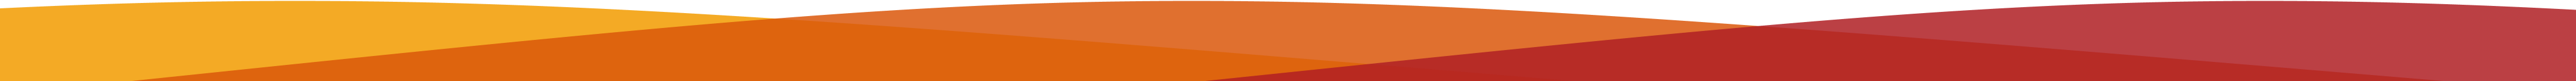

In [64]:
soup.prettify()

In [69]:
soup.find_all('div',{'class': "table-container ng-star-inserted"})

[]

## categoria chamados

In [71]:
# set implicit wait time
driver.implicitly_wait(10) # seconds

driver.get("https://freightech.ambev.com.br/#/categoria-chamados")

In [72]:
driver.find_elements_by_xpath("/html/body/app-root/ft-home/div/main/div/ft-categoria-chamados/div/div/div/div/ft-dinamic-grid/ag-grid-angular/div/div[2]")

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: find_elements_by_* commands are deprecated. Please use find_elements() instead
  """Entry point for launching an IPython kernel.


[<selenium.webdriver.remote.webelement.WebElement (session="7fd21c7c14d7be5167a13b971ce99185", element="a7de3d61-6591-4847-bfe6-c1e228aac1a4")>]

In [73]:
soup = BeautifulSoup(driver.page_source, 'html.parser')

In [81]:
table = [item.get_text() for item in soup.find_all('div',{'class': "ag-root-wrapper-body ag-layout-normal ag-focus-managed"})]